In [1]:
#coding=utf-8
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys
from tqdm import tqdm

from torch import optim
from time import gmtime, strftime
from tensorboardX import SummaryWriter

import matplotlib.pyplot as plt

from config_bdpt import input_size, root, proposalN, channels
# from config import input_size, root, proposalN, channels
from utils.read_dataset_eval import read_dataset
from utils.auto_laod_resume import auto_load_resume
from utils.utils import TrainClock, save_args, AverageMeter, AUCMeter,calculate_accuracy
from networks.model_bdpt import MainNet
# from networks.model import MainNet

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if CUDA else "cpu")

In [3]:
# dataset
set = 'Mura_bp'
if set == 'CUB':
    root = './datasets/CUB_200_2011'  # dataset path
    # model path
    pth_path = "./models/cub_epoch144.pth"
    num_classes = 200
elif set == 'Aircraft':
    root = './datasets/FGVC-aircraft'  # dataset path
    # model path
    pth_path = "./models/air_epoch146.pth"
    num_classes = 100
elif set == 'Mura':
    root = r'E:\Xing\Data\MURA-v1.1'  # dataset path
    pth_path = r'C:\Users\Xing\Projects\AirGo\MMAL-Net\checkpoint\mura\epoch48.pth'
    num_classes = 7
elif set == 'Mura_bp':
#     model_path = './checkpoint/mura_bp_bimodel_adj0103'  # pth save path
    root = r'E:\Xing\Data\MURA-v1.1'  # dataset path
    pth_path = r'C:/Users/Xing/Projects/AirGo/MMAL-Net/checkpoint/mura_bp_bimodel_adj0103/best_model.pth'
    num_classes = 7

batch_size = 1

#load dataset
_, testloader = read_dataset(input_size, batch_size, root, set)

Loading Mura
Loading testset


In [4]:
# 定义模型
model = MainNet(proposalN=proposalN, num_classes=num_classes, channels=channels)

model = model.to(DEVICE)

#加载checkpoint
if os.path.exists(pth_path):
    epoch = auto_load_resume(model, pth_path, status='test')
else:
    sys.exit('There is not a pth exist.')

Load model from C:/Users/Xing/Projects/AirGo/MMAL-Net/checkpoint/mura_bp_bimodel_adj0103/best_model.pth
Resume from C:/Users/Xing/Projects/AirGo/MMAL-Net/checkpoint/mura_bp_bimodel_adj0103/best_model.pth


In [5]:
criterion = nn.BCELoss()

In [6]:
# torch.cuda.set_device(3)
# from utils import calculate_accuracy

losses_val = AverageMeter('loss')
accuracies_val = AverageMeter('acc')
model.eval()
y = []
pred = []

#fileio.maybe_make_new_dir(result_path)
with torch.no_grad():
    for i, data in tqdm(enumerate(testloader)):
        
        if set == 'CUB':
            x, label, boxes, _ = data
        elif set == 'Mura_bp':
            x, label_bp, label = data
        else:
            x, label = data
            
        image_val = x.to(DEVICE)
        targets_val = label.float().to(DEVICE)
        outputs_logits, local_imgs = model(image_val, epoch, i, 'test', DEVICE)[-2:]
        outputs_val = F.sigmoid(outputs_logits)
        
        print(targets_val.shape,outputs_val.shape)
        
#         targets_val = data['label'].float().cuda()
#         images_val = data['image'].float().cuda()
#         outputs_val = model(images_val)
        loss_val = criterion(outputs_val, targets_val)
        
#         add_gl_image_index(images_val, patches_val, outputs_val, targets_val,  writer, subset='val', epoch=0, index = j)
        
        acc_val = calculate_accuracy(outputs_val, targets_val)
        losses_val.update(loss_val.item(), targets_val.size(0))
        accuracies_val.update(acc_val, targets_val.size(0))
        y.append(targets_val.cpu().numpy())
        pred.append(outputs_val.cpu().numpy())

print('val_loss: ', losses_val.avg, 'val_acc: ', accuracies_val.avg)


0it [00:00, ?it/s]C:\Users\Windows\anaconda3\envs\env_torch\lib\site-packages\torch\nn\functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\Windows\anaconda3\envs\env_torch\lib\site-packages\torch\nn\modules\loss.py:512: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
3it [00:04,  2.82s/it]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

7it [00:04,  1.41s/it]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


11it [00:04,  1.39it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


13it [00:04,  1.93it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

18it [00:04,  3.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


22it [00:05,  6.10it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


27it [00:05,  9.42it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

31it [00:05, 12.75it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

35it [00:05, 15.11it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


39it [00:06, 16.99it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


43it [00:06, 17.53it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


47it [00:06, 17.92it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


49it [00:06, 17.87it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

54it [00:06, 18.90it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

58it [00:07, 18.92it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

62it [00:07, 18.33it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


66it [00:07, 18.72it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


70it [00:07, 18.53it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


74it [00:07, 19.08it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


79it [00:08, 19.34it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

83it [00:08, 19.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


87it [00:08, 18.21it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


91it [00:08, 18.03it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


94it [00:08, 18.71it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


99it [00:09, 18.62it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

103it [00:09, 18.95it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


105it [00:09, 18.65it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


111it [00:09, 19.39it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

115it [00:10, 19.50it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


119it [00:10, 19.60it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

121it [00:10, 19.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

127it [00:10, 20.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

130it [00:10, 19.82it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


135it [00:11, 19.81it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

137it [00:11, 19.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

143it [00:11, 19.98it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


146it [00:11, 19.91it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

150it [00:11, 19.64it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

154it [00:12, 19.14it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


158it [00:12, 18.14it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


162it [00:12, 18.39it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


166it [00:12, 18.59it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

169it [00:12, 19.31it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

175it [00:13, 19.84it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


179it [00:13, 19.43it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

181it [00:13, 18.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

185it [00:13, 17.69it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


189it [00:13, 17.68it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


193it [00:14, 18.73it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

198it [00:14, 19.25it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


202it [00:14, 18.97it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


206it [00:14, 18.94it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


210it [00:14, 19.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


214it [00:15, 18.38it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


218it [00:15, 17.85it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


222it [00:15, 17.85it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


226it [00:15, 18.44it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


230it [00:16, 18.65it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


234it [00:16, 18.94it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

236it [00:16, 19.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


241it [00:16, 19.25it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

246it [00:16, 19.29it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


249it [00:17, 19.83it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

254it [00:17, 19.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


258it [00:17, 19.58it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


260it [00:17, 19.17it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

266it [00:17, 19.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

269it [00:18, 20.09it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


272it [00:18, 20.04it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


277it [00:18, 18.51it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


281it [00:18, 18.65it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


285it [00:18, 18.85it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


289it [00:19, 17.89it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

293it [00:19, 17.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


295it [00:19, 17.02it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


301it [00:19, 18.14it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


303it [00:19, 16.72it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

309it [00:20, 18.24it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


313it [00:20, 18.58it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


317it [00:20, 18.15it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


319it [00:20, 18.21it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

324it [00:21, 18.88it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

329it [00:21, 18.69it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


331it [00:21, 18.50it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

336it [00:21, 19.28it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

341it [00:21, 19.34it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

343it [00:22, 19.47it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

349it [00:22, 20.28it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

352it [00:22, 20.40it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

355it [00:22, 19.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


361it [00:22, 20.30it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

364it [00:23, 20.22it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

367it [00:23, 20.08it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

373it [00:23, 20.26it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

376it [00:23, 20.02it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

379it [00:23, 19.42it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


385it [00:24, 19.66it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

389it [00:24, 19.38it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


392it [00:24, 19.91it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

396it [00:24, 18.72it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

398it [00:24, 17.99it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

403it [00:25, 18.50it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


409it [00:25, 20.03it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


412it [00:25, 18.77it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


417it [00:25, 18.50it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


420it [00:25, 19.13it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

423it [00:26, 19.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

429it [00:26, 19.95it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


432it [00:26, 19.87it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

435it [00:26, 20.06it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


440it [00:27, 18.51it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


444it [00:27, 18.15it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


449it [00:27, 18.80it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

452it [00:27, 19.53it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

456it [00:27, 19.64it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


461it [00:28, 19.74it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


465it [00:28, 19.45it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


467it [00:28, 19.45it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

472it [00:28, 19.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


477it [00:28, 19.73it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

481it [00:29, 19.60it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

484it [00:29, 19.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

488it [00:29, 19.77it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


492it [00:29, 19.81it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


497it [00:29, 19.58it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

501it [00:30, 19.15it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


503it [00:30, 18.78it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


509it [00:30, 19.80it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

511it [00:30, 19.79it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

516it [00:30, 19.90it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


520it [00:31, 19.27it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

523it [00:31, 19.56it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

529it [00:31, 19.94it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


531it [00:31, 19.45it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

536it [00:31, 19.14it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

539it [00:32, 19.75it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

542it [00:32, 19.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


547it [00:32, 19.54it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


551it [00:32, 19.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

554it [00:32, 19.56it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

559it [00:33, 19.53it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


564it [00:33, 19.19it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

567it [00:33, 19.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

570it [00:33, 19.93it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


576it [00:33, 20.03it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


579it [00:34, 20.31it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

582it [00:34, 19.77it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

588it [00:34, 19.87it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


590it [00:34, 19.31it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

595it [00:34, 19.33it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


600it [00:35, 19.10it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

602it [00:35, 19.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


607it [00:35, 19.52it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


612it [00:35, 19.76it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

614it [00:35, 19.28it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


619it [00:36, 19.78it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


624it [00:36, 19.58it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

626it [00:36, 19.44it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

632it [00:36, 19.93it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


636it [00:36, 18.85it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


640it [00:37, 18.71it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


643it [00:37, 19.40it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

647it [00:37, 19.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

651it [00:37, 18.89it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


656it [00:37, 19.72it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

658it [00:38, 19.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

663it [00:38, 19.36it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


667it [00:38, 16.86it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


671it [00:38, 17.18it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


675it [00:39, 17.92it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


679it [00:39, 18.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

683it [00:39, 18.65it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


686it [00:39, 19.23it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

690it [00:39, 19.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


695it [00:40, 19.54it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


697it [00:40, 19.31it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

702it [00:40, 19.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


707it [00:40, 19.40it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


711it [00:40, 19.54it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

714it [00:41, 19.98it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

719it [00:41, 19.31it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


722it [00:41, 19.10it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


727it [00:41, 19.47it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

729it [00:41, 18.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


734it [00:42, 18.51it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

737it [00:42, 19.01it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


743it [00:42, 20.13it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

746it [00:42, 19.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


750it [00:42, 18.16it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


754it [00:43, 18.25it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

758it [00:43, 18.46it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


763it [00:43, 18.90it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

767it [00:43, 19.25it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


769it [00:43, 18.81it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

774it [00:44, 18.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

776it [00:44, 18.31it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

781it [00:44, 18.50it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


785it [00:44, 18.45it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


790it [00:45, 18.69it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

794it [00:45, 18.53it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


798it [00:45, 17.81it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

800it [00:45, 18.37it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


805it [00:45, 18.61it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


809it [00:46, 16.44it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

811it [00:46, 16.44it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


815it [00:46, 14.98it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


819it [00:46, 15.70it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


822it [00:46, 16.65it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


827it [00:47, 17.95it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


829it [00:47, 18.13it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


835it [00:47, 19.32it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

837it [00:47, 19.12it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

843it [00:48, 19.73it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

845it [00:48, 19.52it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


851it [00:48, 19.91it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

853it [00:48, 19.28it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


859it [00:48, 19.79it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

861it [00:48, 19.72it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

867it [00:49, 20.09it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

870it [00:49, 19.22it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


873it [00:49, 19.74it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

879it [00:49, 20.25it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


882it [00:50, 19.72it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


885it [00:50, 19.89it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

891it [00:50, 20.70it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

894it [00:50, 20.48it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

899it [00:50, 18.95it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


901it [00:51, 17.96it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

905it [00:51, 18.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


909it [00:51, 18.50it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


913it [00:51, 18.39it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

916it [00:51, 19.32it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

921it [00:52, 19.63it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


926it [00:52, 20.34it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

929it [00:52, 20.35it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


932it [00:52, 20.49it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

938it [00:52, 20.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

941it [00:53, 20.74it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

944it [00:53, 20.90it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

950it [00:53, 20.62it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


953it [00:53, 19.99it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

956it [00:53, 19.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

962it [00:54, 20.04it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


965it [00:54, 20.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

968it [00:54, 19.63it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


974it [00:54, 20.38it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

977it [00:54, 20.38it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

980it [00:54, 20.01it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


986it [00:55, 20.69it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

989it [00:55, 20.60it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


995it [00:55, 20.28it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


998it [00:55, 19.77it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1001it [00:55, 20.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1007it [00:56, 19.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1010it [00:56, 19.90it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1014it [00:56, 18.52it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1019it [00:56, 18.82it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1021it [00:57, 19.06it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1027it [00:57, 20.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1030it [00:57, 19.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1035it [00:57, 19.59it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1040it [00:57, 20.26it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1043it [00:58, 20.27it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1049it [00:58, 20.66it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1052it [00:58, 20.24it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1055it [00:58, 20.37it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1061it [00:58, 20.79it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1064it [00:59, 21.01it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1067it [00:59, 20.64it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1073it [00:59, 20.92it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1076it [00:59, 21.17it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1079it [00:59, 20.81it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1085it [01:00, 19.62it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1087it [01:00, 18.80it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1091it [01:00, 18.48it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1094it [01:00, 19.04it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1099it [01:00, 19.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1104it [01:01, 20.30it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1107it [01:01, 20.49it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1110it [01:01, 20.36it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1116it [01:01, 19.86it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1119it [01:01, 20.00it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1122it [01:02, 19.06it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1127it [01:02, 18.63it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1129it [01:02, 17.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1135it [01:02, 18.96it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1138it [01:02, 19.58it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1142it [01:03, 19.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1146it [01:03, 17.86it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1148it [01:03, 17.62it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1154it [01:03, 19.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1157it [01:03, 19.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1163it [01:04, 20.00it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1166it [01:04, 20.25it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1169it [01:04, 20.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1175it [01:04, 20.62it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1181it [01:05, 21.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1184it [01:05, 20.84it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1187it [01:05, 20.58it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1193it [01:05, 20.79it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1196it [01:05, 20.51it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1199it [01:05, 20.08it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1204it [01:06, 19.39it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1209it [01:06, 20.26it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1212it [01:06, 19.75it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1217it [01:06, 19.99it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1220it [01:06, 20.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1223it [01:07, 20.19it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1229it [01:07, 20.19it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1232it [01:07, 19.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1237it [01:07, 19.89it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1240it [01:07, 20.01it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1243it [01:08, 19.80it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1249it [01:08, 20.92it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1252it [01:08, 20.55it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1255it [01:08, 20.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1261it [01:09, 19.88it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1265it [01:09, 18.82it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1267it [01:09, 18.25it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1273it [01:09, 19.42it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1275it [01:09, 19.58it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1281it [01:10, 20.55it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1284it [01:10, 20.66it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1287it [01:10, 20.94it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1293it [01:10, 21.17it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1296it [01:10, 20.96it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1302it [01:11, 21.10it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1305it [01:11, 20.99it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1308it [01:11, 20.98it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1314it [01:11, 20.66it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1317it [01:11, 20.42it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1320it [01:11, 20.51it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1326it [01:12, 20.95it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1329it [01:12, 20.38it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1334it [01:12, 18.87it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1337it [01:12, 19.85it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1340it [01:12, 19.87it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1346it [01:13, 19.43it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1350it [01:13, 18.53it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1354it [01:13, 18.01it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1357it [01:13, 18.93it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1362it [01:14, 20.11it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1365it [01:14, 19.78it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1368it [01:14, 20.29it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1374it [01:14, 19.92it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1377it [01:14, 19.03it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1381it [01:15, 18.38it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1386it [01:15, 19.44it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1388it [01:15, 18.67it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1392it [01:15, 18.53it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1395it [01:15, 19.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1401it [01:16, 19.79it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1404it [01:16, 19.98it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1407it [01:16, 20.04it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1413it [01:16, 20.62it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1416it [01:16, 20.63it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1419it [01:16, 20.60it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1425it [01:17, 20.61it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1428it [01:17, 20.72it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1431it [01:17, 20.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1437it [01:17, 20.64it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1440it [01:17, 20.74it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1443it [01:18, 20.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1449it [01:18, 20.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1452it [01:18, 20.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1455it [01:18, 20.67it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1458it [01:18, 20.82it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1463it [01:19, 18.82it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1467it [01:19, 17.88it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1472it [01:19, 18.54it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1475it [01:19, 19.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1481it [01:20, 21.14it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1484it [01:20, 20.75it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1490it [01:20, 20.72it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1493it [01:20, 19.42it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1498it [01:20, 18.93it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1500it [01:21, 19.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1506it [01:21, 20.70it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1509it [01:21, 20.38it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1515it [01:21, 20.40it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1518it [01:21, 20.77it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1521it [01:22, 20.38it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1527it [01:22, 20.65it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1530it [01:22, 20.74it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1533it [01:22, 20.77it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1539it [01:22, 20.71it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1542it [01:23, 20.45it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1545it [01:23, 19.96it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1551it [01:23, 20.30it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1554it [01:23, 20.40it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1557it [01:23, 20.27it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1563it [01:24, 19.77it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1566it [01:24, 20.14it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1569it [01:24, 20.42it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1575it [01:24, 20.03it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1578it [01:24, 18.97it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1580it [01:24, 19.02it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1585it [01:25, 19.53it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1588it [01:25, 19.68it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1594it [01:25, 20.17it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1597it [01:25, 20.71it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1600it [01:25, 19.70it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1605it [01:26, 19.43it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1608it [01:26, 19.65it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1614it [01:26, 19.98it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1617it [01:26, 19.98it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1622it [01:27, 19.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1624it [01:27, 18.51it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1629it [01:27, 19.08it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1632it [01:27, 19.67it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1638it [01:27, 19.93it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1641it [01:28, 20.44it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1644it [01:28, 20.82it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1650it [01:28, 20.21it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1653it [01:28, 20.33it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1656it [01:28, 20.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1662it [01:29, 20.84it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1665it [01:29, 20.50it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1668it [01:29, 20.31it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1674it [01:29, 20.67it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1677it [01:29, 20.26it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1680it [01:29, 20.02it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1686it [01:30, 20.55it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1689it [01:30, 20.90it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1692it [01:30, 20.10it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1698it [01:30, 19.73it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1700it [01:30, 19.62it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1706it [01:31, 20.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1709it [01:31, 20.10it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1712it [01:31, 20.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1718it [01:31, 21.01it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1721it [01:31, 20.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1724it [01:32, 19.75it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1730it [01:32, 20.95it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1733it [01:32, 20.36it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1736it [01:32, 20.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1741it [01:32, 18.92it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1744it [01:33, 19.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1750it [01:33, 20.25it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1753it [01:33, 20.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1756it [01:33, 20.49it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1762it [01:33, 20.62it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1765it [01:34, 20.29it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1768it [01:34, 20.35it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1774it [01:34, 21.09it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1777it [01:34, 21.00it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1780it [01:34, 21.08it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1786it [01:35, 21.33it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1789it [01:35, 21.32it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1792it [01:35, 21.21it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1798it [01:35, 20.85it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1801it [01:35, 19.54it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1804it [01:35, 20.10it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1810it [01:36, 20.56it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1813it [01:36, 19.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1818it [01:36, 19.27it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1821it [01:36, 19.82it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1824it [01:36, 20.14it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1830it [01:37, 20.34it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1833it [01:37, 20.28it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1836it [01:37, 20.31it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1842it [01:37, 20.55it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1845it [01:38, 21.12it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1848it [01:38, 20.73it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1854it [01:38, 20.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1857it [01:38, 20.40it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1860it [01:38, 19.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1866it [01:39, 20.46it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1869it [01:39, 20.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1872it [01:39, 20.43it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1878it [01:39, 21.27it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1881it [01:39, 21.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1884it [01:39, 20.99it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1890it [01:40, 20.87it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1893it [01:40, 20.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1896it [01:40, 20.36it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1902it [01:40, 20.49it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1905it [01:40, 20.55it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1908it [01:41, 20.77it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1914it [01:41, 20.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1917it [01:41, 20.93it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1920it [01:41, 20.79it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1926it [01:41, 20.98it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1929it [01:42, 20.82it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1932it [01:42, 20.55it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1938it [01:42, 20.84it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1941it [01:42, 20.81it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1944it [01:42, 20.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1950it [01:43, 20.40it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1953it [01:43, 20.49it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1956it [01:43, 20.47it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1962it [01:43, 20.19it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1965it [01:43, 20.08it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1970it [01:44, 19.48it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1973it [01:44, 19.87it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1976it [01:44, 19.88it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1982it [01:44, 20.35it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1985it [01:44, 21.06it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

1988it [01:44, 20.65it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1994it [01:45, 21.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


1997it [01:45, 20.94it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2003it [01:45, 21.26it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2006it [01:45, 20.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2009it [01:45, 20.93it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2015it [01:46, 20.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2018it [01:46, 21.32it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2021it [01:46, 20.81it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2027it [01:46, 20.89it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2030it [01:46, 20.75it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2036it [01:47, 20.66it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2039it [01:47, 20.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2042it [01:47, 20.86it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2048it [01:47, 20.66it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2051it [01:47, 20.79it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2057it [01:48, 20.92it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2060it [01:48, 20.67it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2063it [01:48, 20.45it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2069it [01:48, 20.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2072it [01:49, 20.20it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2075it [01:49, 20.00it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2081it [01:49, 20.31it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2084it [01:49, 19.48it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2089it [01:49, 19.23it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2092it [01:50, 19.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2097it [01:50, 19.70it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2099it [01:50, 18.67it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2105it [01:50, 19.65it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2108it [01:50, 20.06it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2111it [01:51, 19.75it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2117it [01:51, 20.79it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2120it [01:51, 21.23it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2126it [01:51, 20.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2129it [01:51, 20.54it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2132it [01:52, 20.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2138it [01:52, 21.09it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2141it [01:52, 20.60it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2147it [01:52, 20.92it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2150it [01:52, 20.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2156it [01:53, 21.16it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2159it [01:53, 20.91it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2162it [01:53, 21.00it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2168it [01:53, 20.77it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2171it [01:53, 20.80it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2174it [01:54, 20.66it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2180it [01:54, 21.01it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2183it [01:54, 20.67it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2186it [01:54, 20.41it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2192it [01:54, 20.53it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2195it [01:55, 20.03it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2198it [01:55, 19.32it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2203it [01:55, 19.25it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2206it [01:55, 19.82it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2211it [01:55, 19.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2215it [01:56, 19.01it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2221it [01:56, 20.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2224it [01:56, 20.63it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2227it [01:56, 20.49it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2233it [01:56, 20.31it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2236it [01:57, 19.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2239it [01:57, 19.93it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2244it [01:57, 19.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2247it [01:57, 19.67it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2253it [01:57, 20.32it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2256it [01:58, 20.50it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2262it [01:58, 20.58it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2265it [01:58, 20.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2271it [01:58, 20.84it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2274it [01:58, 20.94it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2277it [01:59, 20.58it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2283it [01:59, 20.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2286it [01:59, 20.96it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2289it [01:59, 20.04it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2295it [01:59, 20.41it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2298it [02:00, 20.38it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2304it [02:00, 20.38it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2307it [02:00, 20.62it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2310it [02:00, 20.66it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2316it [02:01, 21.14it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2319it [02:01, 19.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2322it [02:01, 20.21it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2328it [02:01, 20.92it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2331it [02:01, 20.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2337it [02:02, 21.49it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2340it [02:02, 21.89it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2346it [02:02, 21.36it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2349it [02:02, 21.14it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2352it [02:02, 20.43it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2358it [02:03, 20.65it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2361it [02:03, 20.43it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2367it [02:03, 20.91it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2370it [02:03, 20.88it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2373it [02:03, 20.48it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2379it [02:04, 20.44it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2382it [02:04, 20.38it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2385it [02:04, 20.24it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2391it [02:04, 20.67it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2394it [02:04, 20.51it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2397it [02:04, 20.40it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2403it [02:05, 21.02it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2406it [02:05, 20.71it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2412it [02:05, 19.69it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2415it [02:05, 19.74it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2418it [02:05, 20.22it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2423it [02:06, 19.58it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2425it [02:06, 18.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2431it [02:06, 19.93it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2434it [02:06, 20.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2437it [02:06, 19.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2443it [02:07, 20.10it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2446it [02:07, 19.21it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2451it [02:07, 19.57it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2454it [02:07, 20.24it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2460it [02:08, 21.45it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2463it [02:08, 21.63it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2469it [02:08, 20.66it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2472it [02:08, 20.43it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2478it [02:08, 21.09it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2481it [02:09, 20.33it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2484it [02:09, 19.44it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2490it [02:09, 20.11it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2493it [02:09, 20.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2496it [02:09, 20.66it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2502it [02:10, 20.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2505it [02:10, 20.66it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2508it [02:10, 20.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2514it [02:10, 20.62it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2517it [02:10, 20.46it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2520it [02:10, 20.80it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2526it [02:11, 20.81it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2529it [02:11, 20.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2535it [02:11, 20.81it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2538it [02:11, 20.74it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2541it [02:12, 20.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2547it [02:12, 20.87it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2550it [02:12, 20.86it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2553it [02:12, 20.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2559it [02:12, 20.64it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2562it [02:13, 20.89it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2568it [02:13, 20.70it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2571it [02:13, 20.50it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2574it [02:13, 20.39it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2580it [02:13, 20.05it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2583it [02:14, 19.91it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2586it [02:14, 20.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2592it [02:14, 20.09it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2595it [02:14, 19.65it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2599it [02:14, 18.43it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2603it [02:15, 17.55it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2605it [02:15, 17.25it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2610it [02:15, 18.03it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2613it [02:15, 18.70it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2619it [02:15, 19.74it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2622it [02:16, 19.89it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2625it [02:16, 20.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2631it [02:16, 20.08it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2634it [02:16, 20.10it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2637it [02:16, 20.29it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2643it [02:17, 20.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2646it [02:17, 20.19it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2649it [02:17, 20.00it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2655it [02:17, 20.16it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2658it [02:17, 20.19it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2661it [02:18, 20.25it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2667it [02:18, 19.86it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2669it [02:18, 19.72it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2675it [02:18, 20.34it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2678it [02:18, 20.22it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2681it [02:19, 20.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2687it [02:19, 20.45it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2690it [02:19, 20.73it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2693it [02:19, 20.68it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2699it [02:19, 19.79it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2704it [02:20, 20.56it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2707it [02:20, 20.83it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2713it [02:20, 20.88it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2716it [02:20, 21.28it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2722it [02:20, 21.32it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2725it [02:21, 21.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2728it [02:21, 20.49it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2734it [02:21, 21.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2737it [02:21, 21.33it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2743it [02:21, 21.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2746it [02:22, 20.80it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2752it [02:22, 20.94it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2755it [02:22, 20.50it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2758it [02:22, 20.36it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2764it [02:23, 20.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2767it [02:23, 20.60it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2770it [02:23, 20.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2776it [02:23, 20.49it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2779it [02:23, 20.75it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2784it [02:24, 19.41it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2786it [02:24, 19.32it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2792it [02:24, 20.20it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2795it [02:24, 20.48it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2801it [02:24, 20.58it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2804it [02:25, 19.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2808it [02:25, 17.96it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2810it [02:25, 17.42it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2815it [02:25, 18.60it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2820it [02:25, 19.29it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2824it [02:26, 18.35it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2827it [02:26, 18.89it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2832it [02:26, 20.05it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2835it [02:26, 19.97it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2838it [02:26, 20.34it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2844it [02:27, 19.68it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2848it [02:27, 18.08it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2852it [02:27, 18.06it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2854it [02:27, 18.17it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2860it [02:27, 19.51it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2863it [02:28, 20.02it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2869it [02:28, 20.61it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2872it [02:28, 20.47it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2875it [02:28, 20.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2881it [02:28, 21.07it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2884it [02:29, 20.94it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2890it [02:29, 20.65it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2893it [02:29, 20.57it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2896it [02:29, 20.63it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2902it [02:29, 20.16it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2905it [02:30, 20.58it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2908it [02:30, 20.68it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2914it [02:30, 20.33it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2917it [02:30, 20.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2920it [02:30, 20.54it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2926it [02:31, 20.84it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2929it [02:31, 20.59it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2932it [02:31, 20.22it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2938it [02:31, 20.98it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2941it [02:31, 18.58it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2945it [02:32, 17.87it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2947it [02:32, 17.48it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2951it [02:32, 17.42it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2956it [02:32, 18.56it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2961it [02:32, 19.99it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2964it [02:33, 20.42it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2967it [02:33, 19.00it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2972it [02:33, 19.41it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


2975it [02:33, 20.05it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2981it [02:33, 20.00it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2984it [02:34, 20.01it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2987it [02:34, 20.18it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2993it [02:34, 20.86it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2996it [02:34, 21.10it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

2999it [02:34, 21.10it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3005it [02:35, 20.73it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3008it [02:35, 20.61it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3011it [02:35, 20.37it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3017it [02:35, 20.36it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3020it [02:35, 20.28it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3023it [02:36, 20.29it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3029it [02:36, 20.39it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3032it [02:36, 20.23it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3035it [02:36, 20.36it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3041it [02:36, 20.56it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3044it [02:37, 20.24it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3047it [02:37, 20.13it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3053it [02:37, 20.47it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3056it [02:37, 20.31it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3059it [02:37, 20.08it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3064it [02:38, 18.27it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3067it [02:38, 19.01it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3073it [02:38, 19.63it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3076it [02:38, 20.46it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3082it [02:38, 20.06it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3085it [02:39, 19.97it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3091it [02:39, 20.56it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3094it [02:39, 20.60it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3097it [02:39, 20.42it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3103it [02:40, 20.62it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3106it [02:40, 20.60it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3109it [02:40, 20.83it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3115it [02:40, 20.75it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3118it [02:40, 20.89it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3121it [02:40, 20.76it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3127it [02:41, 20.58it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3130it [02:41, 21.03it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3133it [02:41, 20.91it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3139it [02:41, 20.36it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3142it [02:41, 19.17it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3146it [02:42, 19.16it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3149it [02:42, 19.03it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3153it [02:42, 17.95it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3157it [02:42, 17.71it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3161it [02:42, 17.89it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3165it [02:43, 17.18it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3169it [02:43, 17.40it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3172it [02:43, 18.23it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3175it [02:43, 18.14it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3181it [02:44, 20.03it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3184it [02:44, 19.74it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3187it [02:44, 20.33it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1])

3192it [02:44, 18.38it/s]

 torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3197it [02:44, 18.98it/s]

torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])
torch.Size([1]) torch.Size([1, 1])


3197it [02:45, 19.36it/s]

val_loss:  0.41621990666694625 val_acc:  0.8270253379824732


In [7]:
import numpy as np

In [8]:
y= np.asarray(y)
pred= np.asarray(pred).squeeze()

In [9]:
y,pred

(array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [1.]], dtype=float32),
 array([0.12345718, 0.07417913, 0.22156534, ..., 0.12967958, 0.3910888 ,
        0.9920901 ], dtype=float32))

In [10]:
y.shape

(3197, 1)

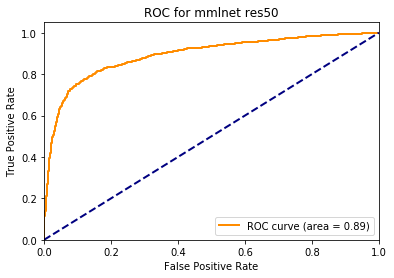

In [11]:
from sklearn import metrics

%matplotlib inline

fpr, tpr, thresholds = metrics.roc_curve(y, pred)

roc_auc = metrics.auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for mmlnet res50')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

threshold = 0.5

pred_t = pred > threshold
pred_t.astype(int)

cm = confusion_matrix(y,pred_t)


In [16]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y,pred_t)

0.6505517138460657

In [13]:
cm[0,0]/sum(cm[0,:]), cm[1,1]/sum(cm[1,:])

(0.8308338332333534, 0.8163398692810457)

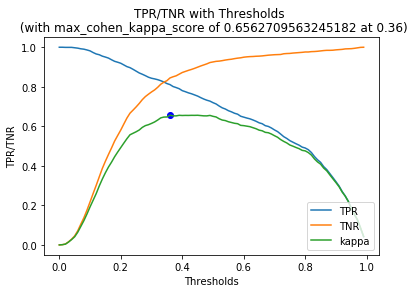

In [14]:
import numpy
from sklearn.metrics import cohen_kappa_score
mali = []
beni = []
cohen = []
tt = numpy.arange(0,1,0.01)
for thres in tt:
#     print(thres)
    pred_t = pred > thres
    pred_t.astype(int)
    cm = confusion_matrix(y,pred_t)
    mali.append(cm[1,1]/sum(cm[1,:]))
    beni.append(cm[0,0]/sum(cm[0,:]))
    cohen.append(cohen_kappa_score(y,pred_t))
# print(thresholds)
plt.figure(),plt.plot(tt,mali,label='TPR'),plt.plot(tt,beni,label='TNR'),plt.plot(tt,cohen,label='kappa')
plt.xlabel('Thresholds')
plt.ylabel('TPR/TNR')

plt.legend(loc="lower right")


net_max = cohen.index(max(cohen))
plt.title('TPR/TNR with Thresholds \n (with max_cohen_kappa_score of {} at {})'.format(max(cohen),tt[net_max]))
plt.scatter(tt[net_max], cohen[net_max], color='b')
plt.show()

In [16]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)



#     plt.figure(figsize=(4, 3))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

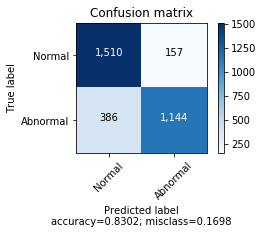

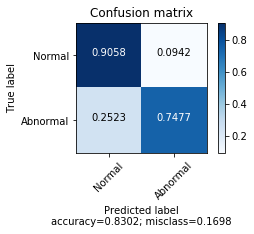

In [17]:
from sklearn.metrics import confusion_matrix

threshold = 0.5

pred_t = pred > threshold
pred_t.astype(int)

cm = confusion_matrix(y,pred_t)

plot_confusion_matrix(cm,('Normal','Abnormal'),normalize= False)
plot_confusion_matrix(cm,('Normal','Abnormal'),normalize= True)

In [25]:
a = 0.7

In [26]:
a>0.5

True

In [28]:
1-(a>0.50)

0

In [43]:
a = torch.rand(3,3)

In [44]:
a

tensor([[0.2847, 0.4820, 0.1940],
        [0.7670, 0.0734, 0.9933],
        [0.7518, 0.1041, 0.5967]])

In [35]:
a.shape

torch.Size([3, 3])

In [36]:
b = [0,2,1]

In [37]:
b = torch.tensor(b)

In [55]:
bb = b.reshape(-1,1)

In [54]:
b

tensor([0, 2, 1])

In [39]:
l = F.nll_loss(a,b)

In [40]:
l

tensor(-0.5024)

In [46]:
sm = nn.LogSoftmax(dim=1)

In [47]:
aa = sm(a)

In [48]:
aa

tensor([[-1.1415, -0.9442, -1.2322],
        [-1.0130, -1.7066, -0.7866],
        [-0.8669, -1.5147, -1.0220]])

In [56]:
l = F.nll_loss(aa,bb)

RuntimeError: multi-target not supported at ..\aten\src\THNN/generic/ClassNLLCriterion.c:20

In [53]:
l

tensor(1.1476)

In [59]:
a = np.random.rand(3,4)

In [66]:
b = np.random.rand(2,4)

In [72]:
t = [a,b]

In [73]:
np.array(t).shape

(2,)

In [74]:
t.pop()

array([[0.255251, 0.802925, 0.39936 , 0.069087],
       [0.192725, 0.195726, 0.765414, 0.068067]])

In [75]:
t.pop()

array([[0.269292, 0.443954, 0.016551, 0.314709],
       [0.903049, 0.930926, 0.752409, 0.969705],
       [0.035113, 0.174226, 0.025869, 0.240254]])

In [76]:
t[0]

IndexError: list index out of range